In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# stating the path to the data where stored in the drive
data_path = '/content/drive/My Drive/datasets/GTSRB.zip'
extracted_path = '/content/traffic GTSRB dataset'  # storing the data in google colab for easy working with it

# extrcating the data
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

## **Data Understanding**

### **Loading the GTSRB Dataset and Exploring its Structure and Contents**

In [ ]:
import os
# Verifying that the dataset is successfully extracted
data_dir = '/content/traffic GTSRB dataset'
print(os.listdir(data_dir))

['Train', 'Meta.csv', 'Test.csv', 'test', 'Meta', 'train', 'Test', 'Train.csv', 'meta']


In [ ]:
import pandas as pd
import os

# Defining the path to the 'GTSRB' directory where the dataset is extracted.
data_dir = '/content/traffic GTSRB dataset'

# Loading the CSV files
train_csv_path = os.path.join(data_dir, 'Train.csv')
test_csv_path = os.path.join(data_dir, 'Test.csv')

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Exploring the structure and contents of the datasets
print("Train Data:")
print(train_data.shape)
print("\nTest Data:")
print(test_data.shape)

# Verifying the number of images in the 'train' and 'test' folders
train_images_path = os.path.join(data_dir, 'train')
test_images_path = os.path.join(data_dir, 'test')

num_train_classes = len(os.listdir(train_images_path))
num_test_images = len(os.listdir(test_images_path))

print(f"\nNumber of classes : {num_train_classes}")
print(f"Number of testing images: {num_test_images}")


Train Data:
(39209, 8)

Test Data:
(12630, 8)

Number of classes : 43
Number of testing images: 12631


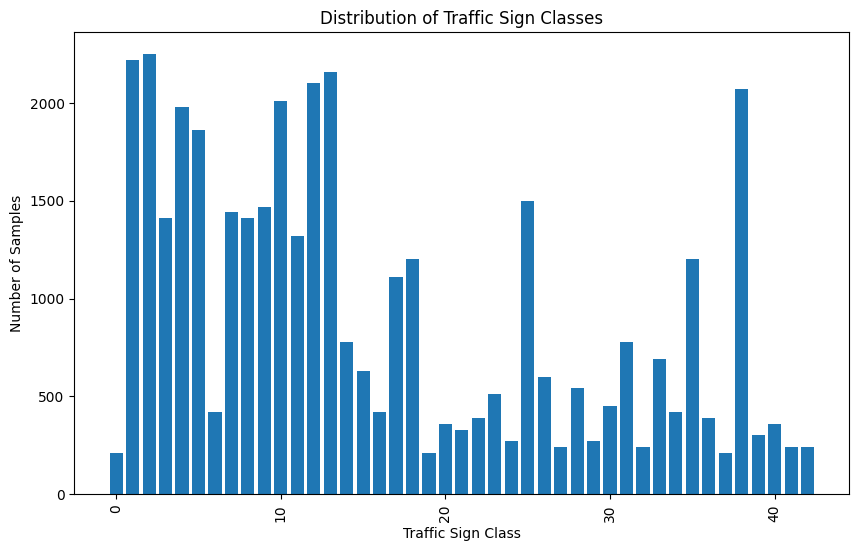

Class Imbalance Ratio: 10.71


In [ ]:
import matplotlib.pyplot as plt

# Analyze the distribution of traffic sign classes
class_distribution = train_data['ClassId'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Traffic Sign Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Traffic Sign Classes')
plt.xticks(rotation=90)
plt.show()

# Calculate the class imbalance ratio
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

In [ ]:
# Print the number of samples for each class
print("Number of samples \nfor each traffic sign class:")
for class_id, count in class_distribution.items():
    print(f"Class {class_id}: {count} samples")

Number of samples 
for each traffic sign class:
Class 2: 2250 samples
Class 1: 2220 samples
Class 13: 2160 samples
Class 12: 2100 samples
Class 38: 2070 samples
Class 10: 2010 samples
Class 4: 1980 samples
Class 5: 1860 samples
Class 25: 1500 samples
Class 9: 1470 samples
Class 7: 1440 samples
Class 3: 1410 samples
Class 8: 1410 samples
Class 11: 1320 samples
Class 18: 1200 samples
Class 35: 1200 samples
Class 17: 1110 samples
Class 14: 780 samples
Class 31: 780 samples
Class 33: 689 samples
Class 15: 630 samples
Class 26: 600 samples
Class 28: 540 samples
Class 23: 510 samples
Class 30: 450 samples
Class 16: 420 samples
Class 6: 420 samples
Class 34: 420 samples
Class 22: 390 samples
Class 36: 390 samples
Class 40: 360 samples
Class 20: 360 samples
Class 21: 330 samples
Class 39: 300 samples
Class 29: 270 samples
Class 24: 270 samples
Class 32: 240 samples
Class 27: 240 samples
Class 41: 240 samples
Class 42: 240 samples
Class 37: 210 samples
Class 0: 210 samples
Class 19: 210 samples

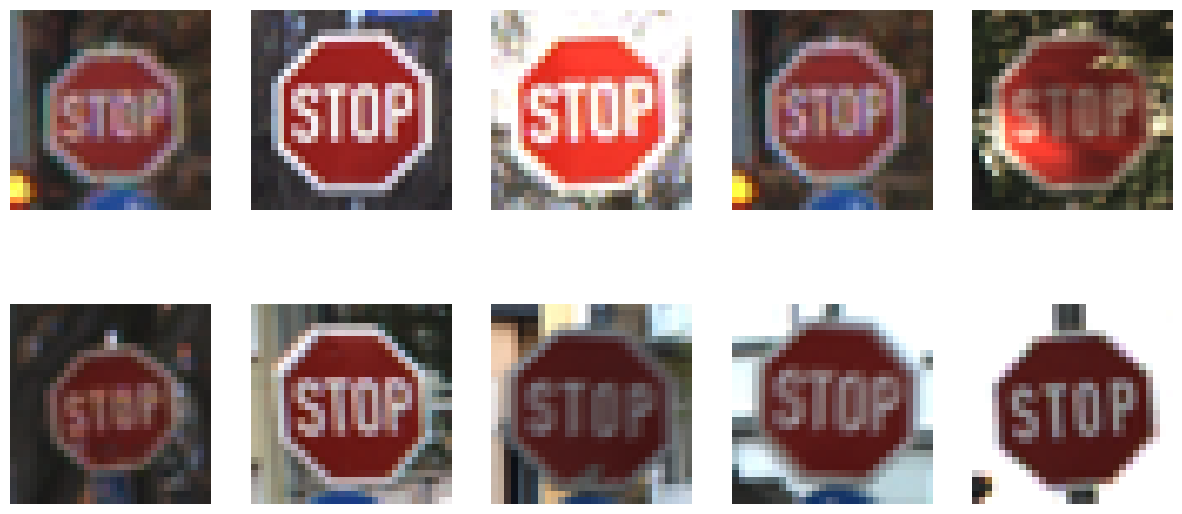

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.image as mpimg

# Path to the 'train' folder containing images of the training dataset.
train_images_path = os.path.join(data_dir, 'train/14')

# Get a list of all image filenames in the 'train' folder and shuffle them
filenames = os.listdir(train_images_path)
random.shuffle(filenames)

# Create a figure with 2 rows and 5 columns to display 10 images
fig, axs = plt.subplots(2, 5, figsize=(15, 7))

# Loop over the first 10 shuffled filenames
for i in range(10):
    filename = filenames[i]

    # Open the image file, resize it to 30x30 pixels, and convert it to a NumPy array
    img = Image.open(os.path.join(train_images_path, filename))
    img = img.resize((30, 30))
    sr = np.array(img)

    # Select the current subplot and display the image
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

# Show the figure
plt.show()

## **Data Preprocessing and Preparation**

In [ ]:
# Initializing empty lists to store data and labels
signs_data = []
image_labels = []

# Specifying the number of classes
number_of_classes = 43

# Looping through each class folder
for i in range(number_of_classes):
    # Specifying the path of the class folder
    train_images_path = '/content/traffic GTSRB dataset/Train'
    path = os.path.join(train_images_path, str(i))

    # Storing the names of all the image files in the class folder
    images = os.listdir(path)

    # Looping through each image file in the class folder
    for image_filename in images:
        try:
            # Opening the image and resizing it
            image_path = os.path.join(path, image_filename)
            image = Image.open(image_path)
            image = image.resize((30, 30))

            # Converting the image to a numpy array and storing it in the data list
            image_np = np.array(image)
            signs_data.append(image_np)

            # Storing the label of the image in the labels list
            image_labels.append(i)

        except:
            print("Error getting image.")

# Converting the data and labels lists to numpy arrays
signs_data = np.array(signs_data)
image_labels = np.array(image_labels)

# printing the shape of the data
print("Shape of the data is: ",signs_data.shape)
print("Shape of the labels is: ", image_labels.shape)

Shape of the data is:  (39209, 30, 30, 3)
Shape of the labels is:  (39209,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the traffic sign labels
one_hot_labels = to_categorical(image_labels, num_classes=43)

# The one_hot_labels array now contains the one-hot encoded representations of the traffic sign labels.
one_hot_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data and labels into training and testing sets with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(signs_data, one_hot_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (31367, 30, 30, 3)
Shape of X_test: (7842, 30, 30, 3)
Shape of y_train: (31367, 43)
Shape of y_test: (7842, 43)


## **Model Development**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add the first Convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))

# Add a MaxPooling layer with pool size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters and a kernel size of (3, 3)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 43 neurons (equal to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
#fitting the model with training and testing data
history = model.fit(X_train,y_train, batch_size = 64, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
491/491 [==============================] - 49s 96ms/step - loss: 3.3351 - accuracy: 0.1716 - val_loss: 1.8372 - val_accuracy: 0.4866
Epoch 2/20
491/491 [==============================] - 45s 92ms/step - loss: 1.9287 - accuracy: 0.4304 - val_loss: 0.9947 - val_accuracy: 0.7362
Epoch 3/20
491/491 [==============================] - 45s 91ms/step - loss: 1.1365 - accuracy: 0.6432 - val_loss: 0.3653 - val_accuracy: 0.8995
Epoch 4/20
491/491 [==============================] - 45s 92ms/step - loss: 0.6982 - accuracy: 0.7803 - val_loss: 0.2352 - val_accuracy: 0.9477
Epoch 5/20
491/491 [==============================] - 46s 93ms/step - loss: 0.4985 - accuracy: 0.8431 - val_loss: 0.1487 - val_accuracy: 0.9617
Epoch 6/20
491/491 [==============================] - 46s 93ms/step - loss: 0.3766 - accuracy: 0.8809 - val_loss: 0.1288 - val_accuracy: 0.9658
Epoch 7/20
491/491 [==============================] - 45s 93ms/step - loss: 0.3269 - accuracy: 0.9000 - val_loss: 0.0967 - val_accuracy:

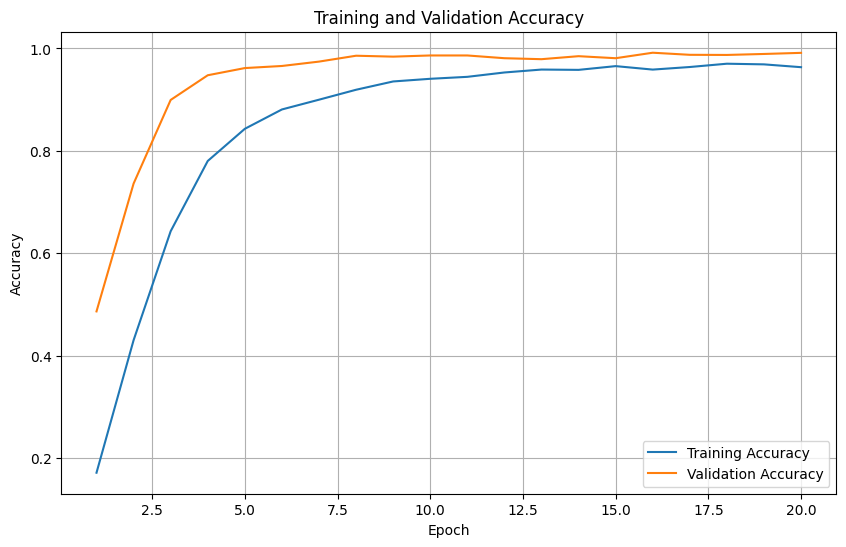

In [ ]:
# Extract the training and validation accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

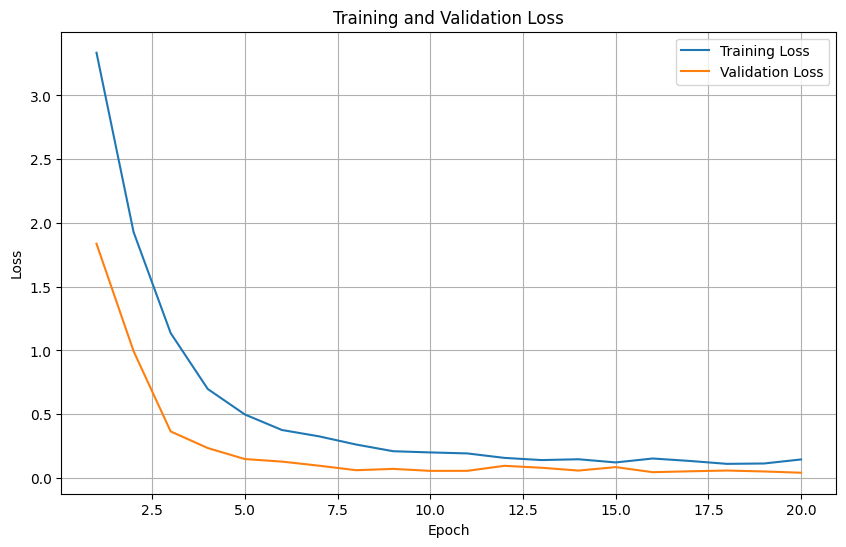

In [ ]:
# Create a plot for loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Retrieve the accuracy from the history object
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Printing the final accuracy
print("Training Accuracy: {:.2f}%".format(train_accuracy[-1] * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy[-1] * 100))

Training Accuracy: 96.35%
Testing Accuracy: 99.15%


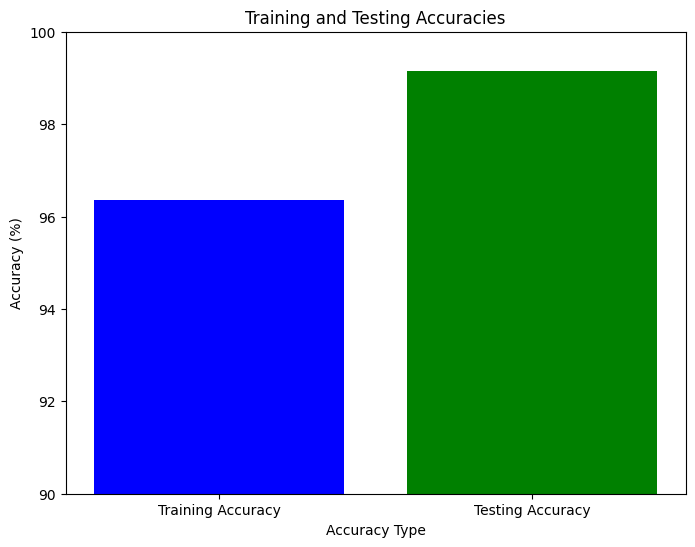

In [ ]:
# Training and testing accuracies
training_accuracy = 96.35
testing_accuracy = 99.15

# Create a bar chart to display the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy], color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.ylim(90, 100)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Making predictions on the test data
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions 'y_pred' back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


# Convert the one-hot encoded predictions 'y_pred' back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded ground truth 'y_test' back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print("Precision: {:.4f}%".format(precision*100))
print("Recall: {:.4f}%".format(recall*100))
print("F1 Score: {:.4f}%".format(f1*100))

246/246 [==============================] - 5s 21ms/step
Precision: 99.1541%
Recall: 99.1456%
F1 Score: 99.1452%


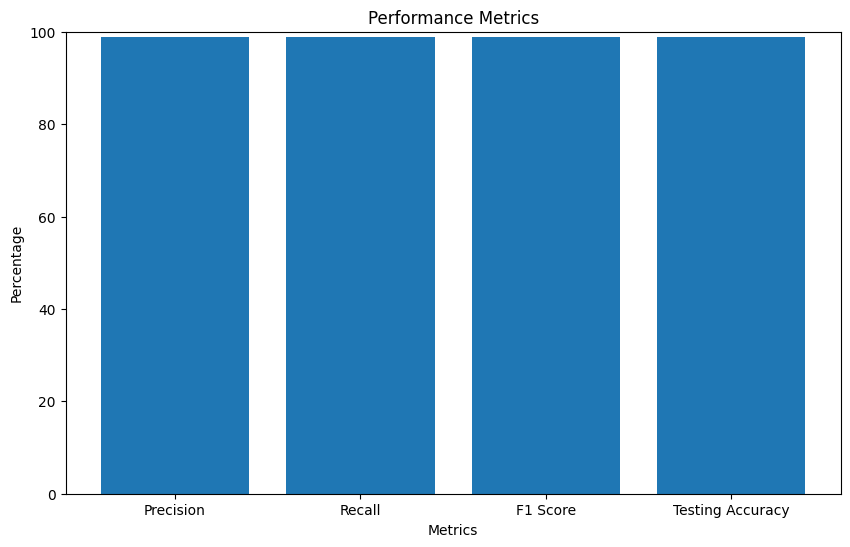

In [ ]:
# Precision, recall, F1 score, and accuracy values
precision = 98.8613
recall = 98.8523
f1 = 98.8514
accuracy = 98.85

# Create a histogram for the metrics
metrics_labels = ['Precision', 'Recall', 'F1 Score', 'Testing Accuracy']
metrics_values = [precision, recall, f1, accuracy]

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics_values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Performance Metrics')
plt.ylim([0, 100])
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion = confusion_matrix(y_true_classes, y_pred_classes)

# Print confusion matrix for each class separately
for i in range(len(confusion)):
    class_name = f"Class {i}"
    print(f"Confusion Matrix for {class_name}:")
    print(confusion[i].reshape(1, -1))
    print()

246/246 [==============================] - 3s 13ms/step
Confusion Matrix for Class 0:
[[35  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Confusion Matrix for Class 1:
[[  0 483   4   0   1   2   0   2   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0]]

Confusion Matrix for Class 2:
[[  0   0 449   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]]

Confusion Matrix for Class 3:
[[  0   0   3 271   0   5   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]]

Confusion Matrix for Class 4:
[[  0   0   2   0 415   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0

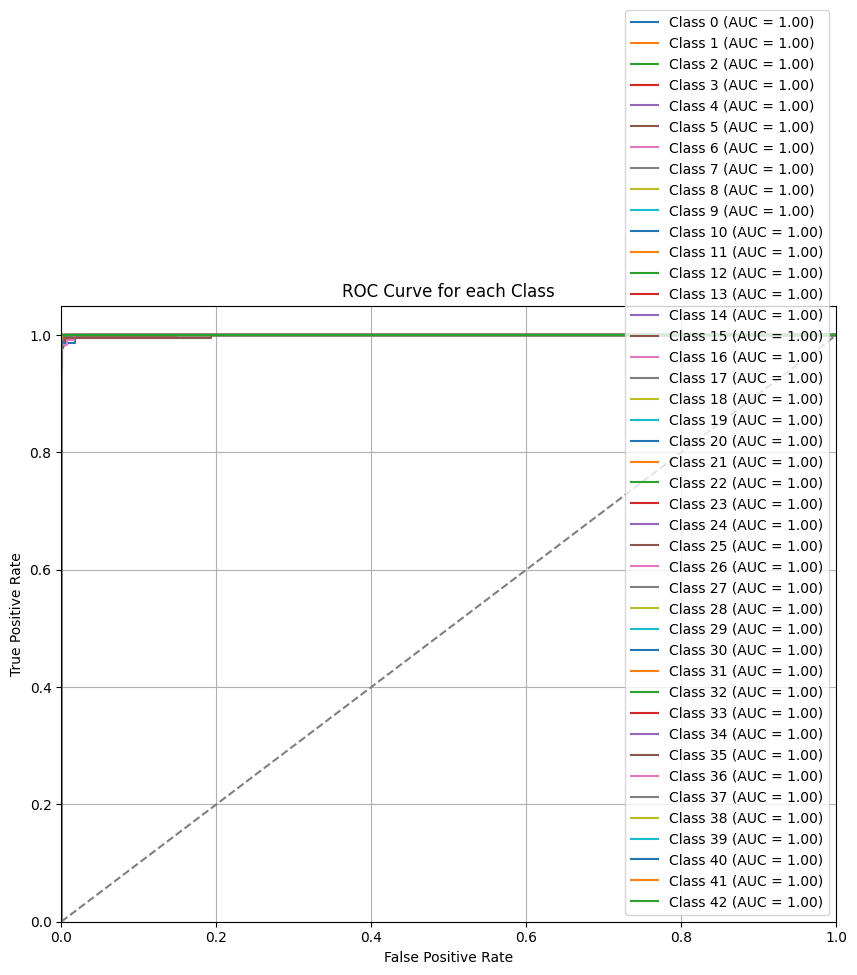

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC for each class separately
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(y_test[0])):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Select one image from the test data (for example, the first image)
image_to_predict = X_test[0]

# Reshape the image to match the input shape of the model
image_to_predict = image_to_predict.reshape(1, 30, 30, 3)

# Make the prediction using the trained model
prediction = model.predict(image_to_predict)

# Get the predicted class (index of the maximum probability)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 26ms/step
Predicted Class: 26
